# 연령대별 교통사고 발생률

In [1]:
from matplotlib import pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery

In [2]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [3]:
plt.rc("font", family="Malgun Gothic")

In [4]:
traffic_accident_rate_sql = """
    WITH license AS (
        SELECT
            age_group,
            SUM(total_2019) AS total_2019,
            SUM(total_2020) AS total_2020,
            SUM(total_2021) AS total_2021,
            SUM(total_2022) AS total_2022
        FROM
            `calcium-channel-428804-c3.traffic_accident.driver_license_4`
        GROUP BY
            age_group
    ),
    accident AS (
        SELECT
            age_group,
            SUM(total_2019) AS total_2019,
            SUM(total_2020) AS total_2020,
            SUM(total_2021) AS total_2021,
            SUM(total_2022) AS total_2022
        FROM
            `calcium-channel-428804-c3.traffic_accident.traffic_accident_5`
        GROUP BY
            age_group
    )
    SELECT
        A.age_group,
        (B.total_2019 / A.total_2019) * 100 AS traffic_accident_rate_2019,
        (B.total_2019 / A.total_2020) * 100 AS traffic_accident_rate_2020,
        (B.total_2019 / A.total_2021) * 100 AS traffic_accident_rate_2021,
        (B.total_2019 / A.total_2022) * 100 AS traffic_accident_rate_2022
    FROM
        license AS A INNER JOIN accident AS B
    ON
        A.age_group = B.age_group;
"""

In [5]:
traffic_accident_rate_df = client.query(traffic_accident_rate_sql).to_dataframe()
traffic_accident_rate_df = traffic_accident_rate_df.set_index("age_group")

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [6]:
traffic_accident_rate_df["average_rate"] = traffic_accident_rate_df.mean(axis=1)
traffic_accident_rate_df = traffic_accident_rate_df[["average_rate"]]

In [7]:
traffic_accident_rate_df

,average_rate
age_group,
10,2.565266
20,0.629624
30,0.553724
40,0.576452
50,0.750512
60,0.649406
65,0.870944


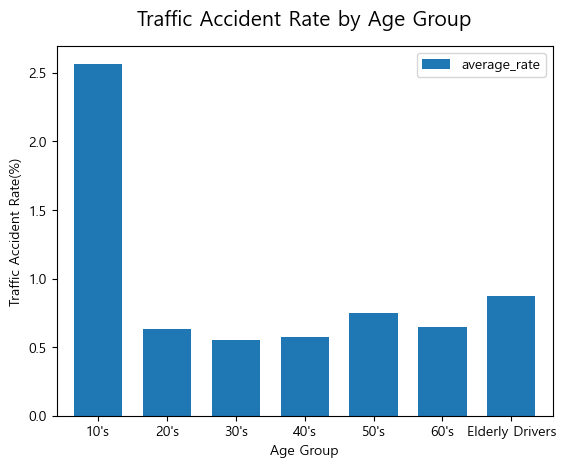

In [8]:
age_labels = ["10's", "20's", "30's", "40's", "50's", "60's", "Elderly Drivers"]
traffic_accident_rate_df["average_rate"].plot(kind="bar", width=0.7)
plt.title("Traffic Accident Rate by Age Group", size=15, pad=15)
plt.xlabel("Age Group")
plt.ylabel("Traffic Accident Rate(%)")
plt.xticks(ticks=range(len(age_labels)), labels=age_labels, rotation=0)
plt.legend(loc="best")
plt.savefig("traffic_accident_rate.png", bbox_inches="tight")